In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [37]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [38]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230308 entries, 0 to 230307
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  230308 non-null  int64  
 1   kWh       230308 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.5 MB


<Axes: >

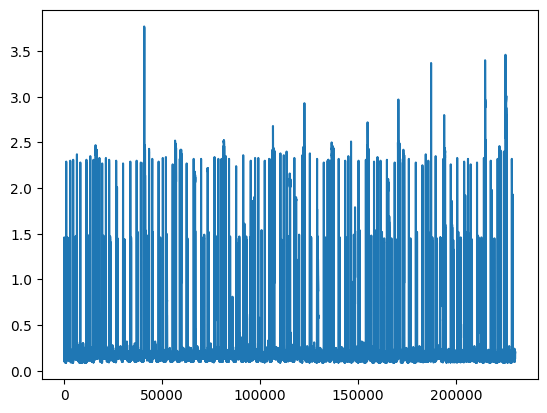

In [39]:
conso_data['kWh'].plot()

In [40]:
l=len(conso_data)-1
l

230307

In [41]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [42]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
230303,17443,0.21,17.443,206.386516,5512617149
230304,17420,0.21,17.420,206.659013,5512634569
230305,17709,0.20,17.709,203.286465,5512652278
230306,17848,0.20,17.848,201.703272,5512670126
230307,17727,0.20,17.727,203.080047,5512687853


In [43]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

5512687853000

In [44]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 1, 59, 19, 268252)

In [45]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:59:45.557252,07/03/24
1,26243,0.14,26.243,137.179438,52532,2024-03-07 02:00:11.800252,07/03/24
2,25885,0.14,25.885,139.076685,78417,2024-03-07 02:00:37.685252,07/03/24
3,25754,0.14,25.754,139.784111,104171,2024-03-07 02:01:03.439252,07/03/24
4,25774,0.14,25.774,139.675642,129945,2024-03-07 02:01:29.213252,07/03/24
...,...,...,...,...,...,...,...
230303,17443,0.21,17.443,206.386516,5512617149,2024-05-09 21:16:16.417252,09/05/24
230304,17420,0.21,17.420,206.659013,5512634569,2024-05-09 21:16:33.837252,09/05/24
230305,17709,0.20,17.709,203.286465,5512652278,2024-05-09 21:16:51.546252,09/05/24
230306,17848,0.20,17.848,201.703272,5512670126,2024-05-09 21:17:09.394252,09/05/24


In [46]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('09/05/24', 5, 2024)

In [47]:
here = now.strftime('%H:%M:%S')
here

'21:17:35'

In [48]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [49]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
227495,29549,0.12,29.549,121.831534,5436063614,2024-05-09 00:00:22.882252,09/05/24
227496,29538,0.12,29.538,121.876904,5436093152,2024-05-09 00:00:52.420252,09/05/24
227497,28073,0.13,28.073,128.237096,5436121225,2024-05-09 00:01:20.493252,09/05/24
227498,27621,0.13,27.621,130.335614,5436148846,2024-05-09 00:01:48.114252,09/05/24
227499,28189,0.13,28.189,127.709390,5436177035,2024-05-09 00:02:16.303252,09/05/24
...,...,...,...,...,...,...,...
230303,17443,0.21,17.443,206.386516,5512617149,2024-05-09 21:16:16.417252,09/05/24
230304,17420,0.21,17.420,206.659013,5512634569,2024-05-09 21:16:33.837252,09/05/24
230305,17709,0.20,17.709,203.286465,5512652278,2024-05-09 21:16:51.546252,09/05/24
230306,17848,0.20,17.848,201.703272,5512670126,2024-05-09 21:17:09.394252,09/05/24


In [50]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [51]:
data = list(df_grp['kWh'])
print(data)


[3.093, 3.771, 3.081, 3.532, 4.54, 3.562, 3.545, 3.646, 3.565, 3.352, 3.357, 4.402, 3.508, 3.441, 3.553, 3.734, 3.535, 3.34, 3.89, 3.417, 3.466, 3.637, 3.766, 3.657, 3.829, 3.835, 3.818, 3.421, 3.474, 4.418, 3.399, 4.077, 3.78, 4.06, 3.43, 3.572, 3.443, 4.128, 3.269, 3.316, 3.706, 3.689, 4.224, 3.279, 3.384, 3.763, 4.081, 3.511, 3.302, 3.287, 3.064, 3.749, 3.817, 3.783, 3.409, 3.449, 3.519, 3.265, 3.605, 3.423, 3.337, 3.535, 3.655, 2.813]


In [52]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [53]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='moccasin',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(15, 7)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [54]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.327936
dtype: float64

In [55]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.598562
dtype: float64

In [56]:
last=df_grp.iloc[-1]['kWh']
last

2.813

In [57]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
#df

In [58]:
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('21:17:35', 2.813, 2813)

In [59]:
df_grp.tail(7)

,kWh
days,
03/05/24,3.265
04/05/24,3.605
05/05/24,3.423
06/05/24,3.337
07/05/24,3.535
08/05/24,3.655
09/05/24,2.813


In [60]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [61]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


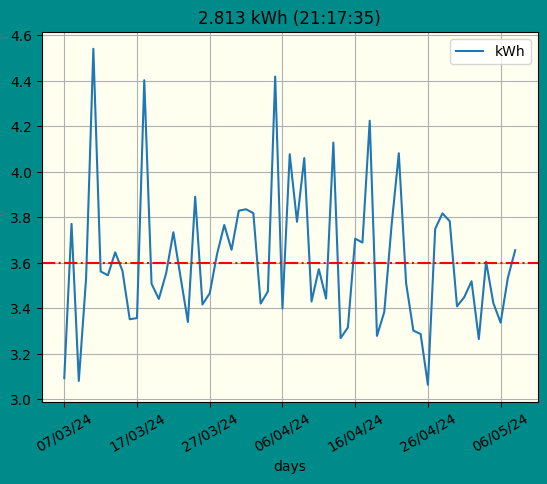

In [62]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

df_grp.iloc[:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


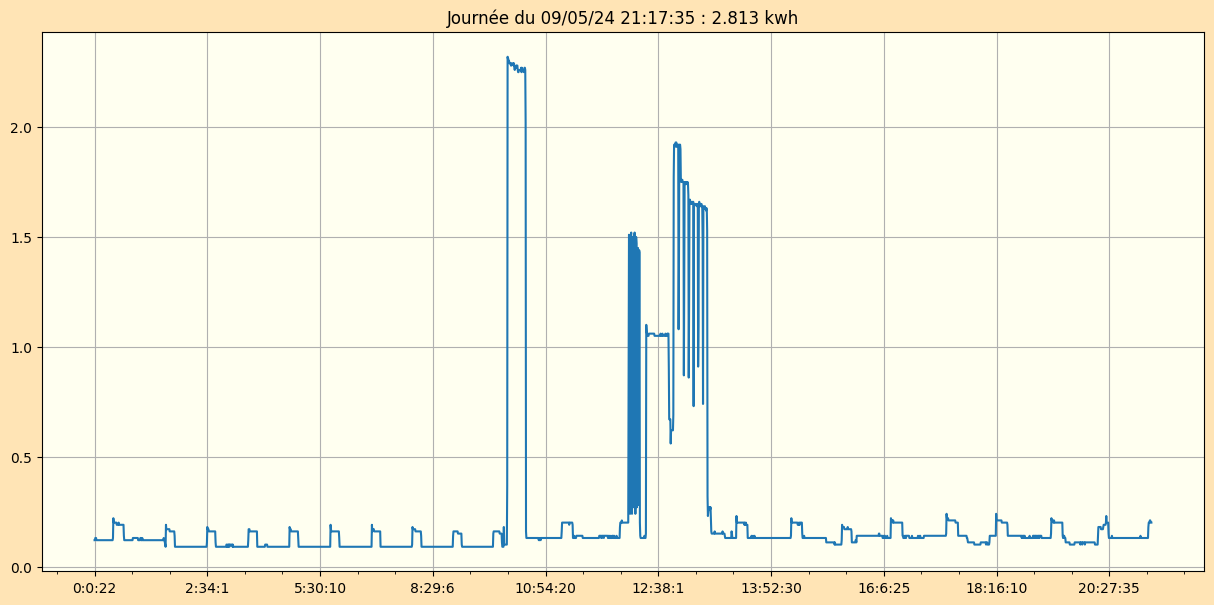

In [63]:
show(day,bgcolor='ivory')

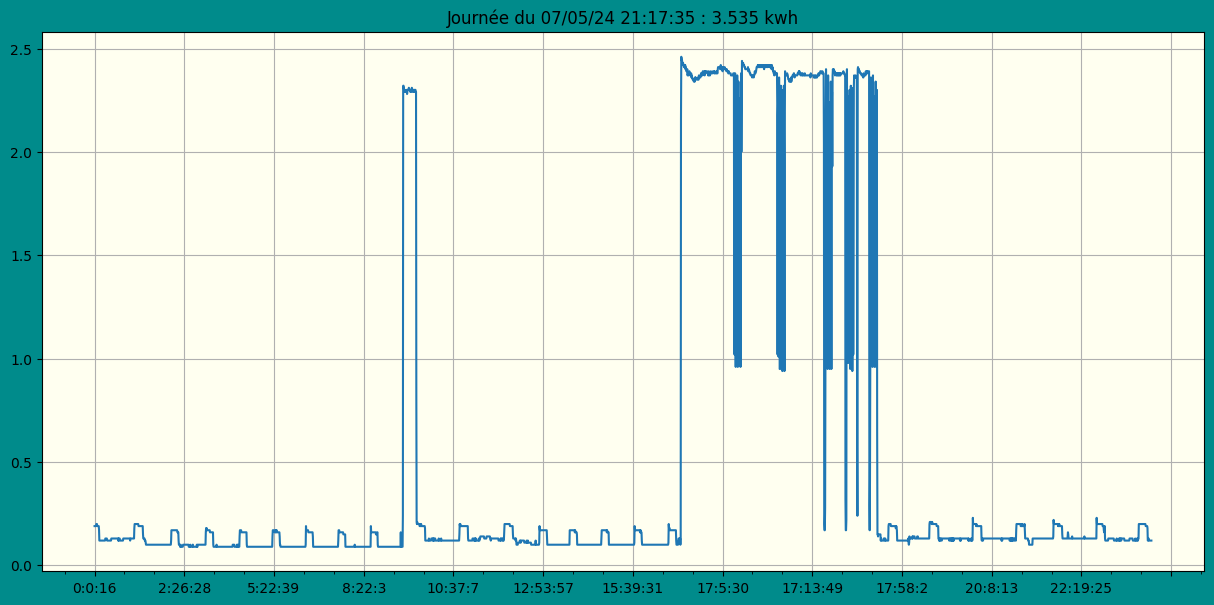

In [64]:
# plot any day
day = '07/05/24'
show(day,pltcolor='darkcyan')